1. cuda device
2. data path, transforms.Compose([transforms.]), ImageFolder
- test 의 경우 transform 랜덤 변환 X
3. batch size 변수, dataloader
4. 이미지 시각화
	- subplot, imshow, title, axis off, tight_layout, show
5. 모델: ResNet18 + FC
	- 모델 정의 (torchvision.models or timm) 및 출력해보기
	- resnet18 파라미터 동결
	- 모델 마지막 차원 확인 후 FC 레이어 / fc 는 파라미터 동결 X
	- 파라미터 확인하기
	- 모델 device 에 올리기 및 출력해보기
6. lr, criterion, optimizer 정의
- optimizer 의 경우 동결 안한 파라미터 list 로
7. epochs 수 정하기
- epoch for 문
	- train 순서
		- model train 모드로
		- loss, total, correct = 0
		- loader for문
			- img, label device 에 올리기
			- model 에 넣기
			- loss
			- optimizer zero grad, 기울기 계산, 역전파 수행 (train 에서만)
			- 현재의 배치 구하고 loss 누적
			- pred 구하고 correct 구하기
			- total 구하기
		- avg loss, acc 계산
		- plot 그리기 위해 list 에 저장
	- test 순서
		- model eval 모드로
		- loss, total, correct = 0
		- no grad()
			- loader for 문
				- 동일
		- avg loss, acc 계산
		- plot 그리기 위해 list 에 저장
	- loss, acc 출력
	- 모델 갱신되면 저장
8. train, test acc, loss plot
9. 실제, 예측 결과, 이미지 시각화 (마지막 배치에서 일부만) -> 오분류 이미지 확인
10. (feature map 시각화)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_availiable() else "cpu")
print(device)

In [ ]:
data_path_train = '/content/drive/MyDrive/딥러닝 파이토치 교과서/5.3_CatDog/catanddog/train'
data_path_test = '/content/drive/MyDrive/딥러닝 파이토치 교과서/5.3_CatDog/catanddog/test'

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.ToTensor()
])

from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(root = data_path_train, transform = train_transform)
test_dataset = ImageFolder(root = data_path_test, transform = test_transform)

In [ ]:
data_path_train

'/content/drive/MyDrive/딥러닝 파이토치 교과서/5.3_CatDog/catanddog/train'

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
len(train_dataset)

385

In [ ]:
train_dataset[0]

(tensor([[[0.9882, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          [0.9882, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          [0.9882, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9804, 0.9804, 0.9804,  ..., 0.8627, 0.8745, 0.8745],
          [0.9804, 0.9804, 0.9804,  ..., 0.8667, 0.8745, 0.8745],
          [0.9804, 0.9804, 0.9804,  ..., 0.8667, 0.8745, 0.8745]],
 
         [[0.8863, 0.8863, 0.8863,  ..., 0.8980, 0.8980, 0.8980],
          [0.8863, 0.8863, 0.8863,  ..., 0.8980, 0.8980, 0.8980],
          [0.8863, 0.8863, 0.8863,  ..., 0.8980, 0.8980, 0.8980],
          ...,
          [0.8392, 0.8392, 0.8392,  ..., 0.4627, 0.4667, 0.4667],
          [0.8392, 0.8392, 0.8392,  ..., 0.4667, 0.4706, 0.4706],
          [0.8392, 0.8392, 0.8392,  ..., 0.4667, 0.4706, 0.4706]],
 
         [[0.5922, 0.5922, 0.5882,  ..., 0.5765, 0.5765, 0.5765],
          [0.5922, 0.5922, 0.5882,  ..., 0.5765, 0.5765, 0.5765],
          [0.5922, 0.5922, 0.5882,  ...,

In [ ]:
train_loader.dataset[384] # 0~384 인덱스

(tensor([[[0.8078, 0.8078, 0.8078,  ..., 1.0000, 1.0000, 1.0000],
          [0.8000, 0.8039, 0.8039,  ..., 1.0000, 1.0000, 1.0000],
          [0.7922, 0.7961, 0.8000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9765, 0.9765, 0.9804,  ..., 0.9961, 1.0000, 1.0000],
          [0.9725, 0.9725, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
          [0.9686, 0.9686, 0.9725,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.6353, 0.6314, 0.6275,  ..., 1.0000, 1.0000, 1.0000],
          [0.6275, 0.6275, 0.6235,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.6196, 0.6196,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.8196, 0.8235, 0.8314,  ..., 0.8706, 0.8745, 0.8784],
          [0.8157, 0.8157, 0.8235,  ..., 0.8706, 0.8706, 0.8745],
          [0.8118, 0.8118, 0.8157,  ..., 0.8706, 0.8706, 0.8706]],
 
         [[0.6510, 0.6471, 0.6392,  ..., 1.0000, 1.0000, 1.0000],
          [0.6431, 0.6392, 0.6353,  ..., 1.0000, 1.0000, 1.0000],
          [0.6275, 0.6275, 0.6275,  ...,

In [ ]:
train_loader.dataset[0][0].size()

torch.Size([3, 224, 224])

In [ ]:
a = iter(train_loader)

In [ ]:
b = next(a)
print(b)
print(b[0].shape, b[1].shape)

[tensor([[[[0.0667, 0.0627, 0.0627,  ..., 0.1020, 0.0980, 0.0941],
          [0.0588, 0.0549, 0.0549,  ..., 0.1059, 0.1020, 0.0980],
          [0.0510, 0.0471, 0.0471,  ..., 0.1137, 0.1020, 0.0980],
          ...,
          [0.0784, 0.0745, 0.0745,  ..., 0.0863, 0.0863, 0.0863],
          [0.0784, 0.0745, 0.0745,  ..., 0.0863, 0.0863, 0.0863],
          [0.0745, 0.0706, 0.0706,  ..., 0.0863, 0.0863, 0.0863]],

         [[0.0667, 0.0627, 0.0627,  ..., 0.1020, 0.0980, 0.0941],
          [0.0588, 0.0549, 0.0549,  ..., 0.1059, 0.1020, 0.0980],
          [0.0510, 0.0471, 0.0471,  ..., 0.1137, 0.1020, 0.0980],
          ...,
          [0.0784, 0.0745, 0.0745,  ..., 0.0863, 0.0863, 0.0863],
          [0.0784, 0.0745, 0.0745,  ..., 0.0863, 0.0863, 0.0863],
          [0.0745, 0.0706, 0.0706,  ..., 0.0863, 0.0863, 0.0863]],

         [[0.0667, 0.0627, 0.0627,  ..., 0.1020, 0.0980, 0.0941],
          [0.0588, 0.0549, 0.0549,  ..., 0.1059, 0.1020, 0.0980],
          [0.0510, 0.0471, 0.0471,  ..., 

In [ ]:
train_loader.dataset.class_to_idx

{'Cat': 0, 'Dog': 1}

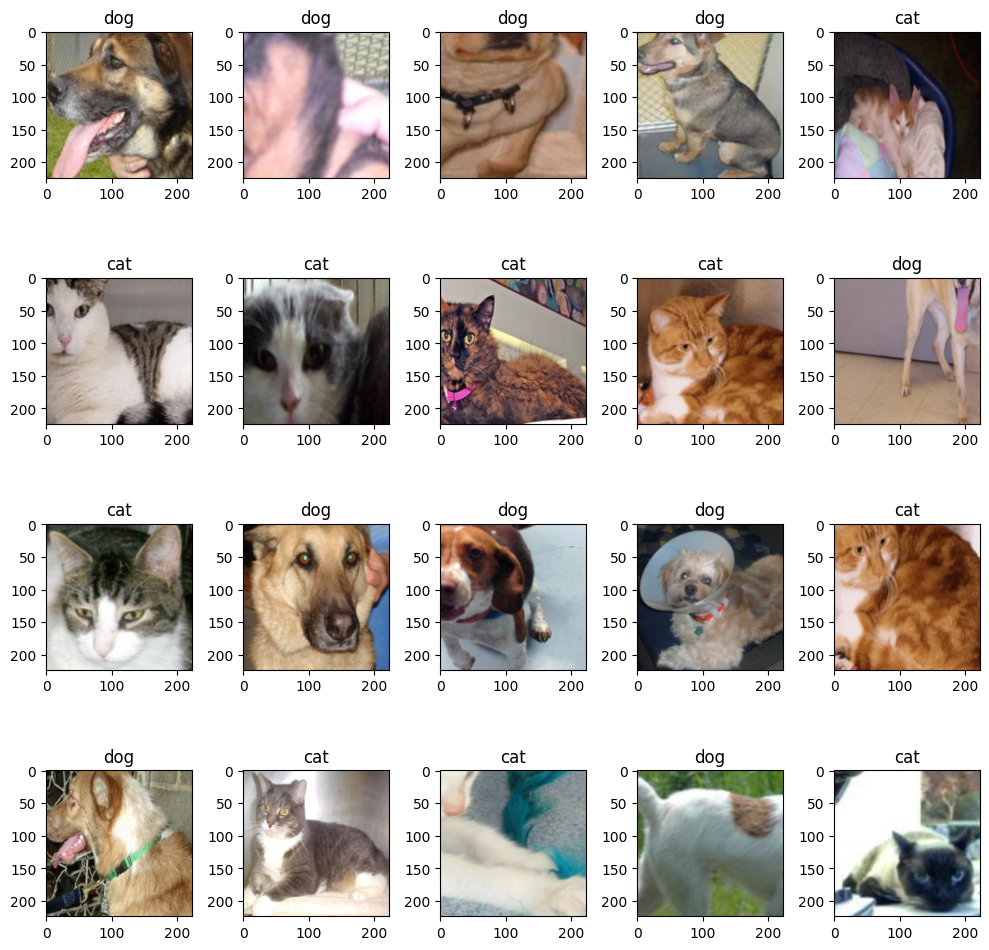

In [ ]:
# 전체 데이터셋에서 랜덤 20 개 시각화

import matplotlib.pyplot as plt
import random

plt.figure(figsize = (10, 10))

for idx in range(20):
  plt.subplot(4, 5, idx+1)
  i = random.randint(0, len(train_dataset))
  img, label = train_dataset[i]
  plt.imshow(img.permute(1, 2, 0))
  if label == 0:
    plt.title('cat')
  else:
    plt.title('dog')
plt.tight_layout()
plt.show()

In [ ]:
img, label = next(iter(train_loader))
img[:20].shape

torch.Size([20, 3, 224, 224])

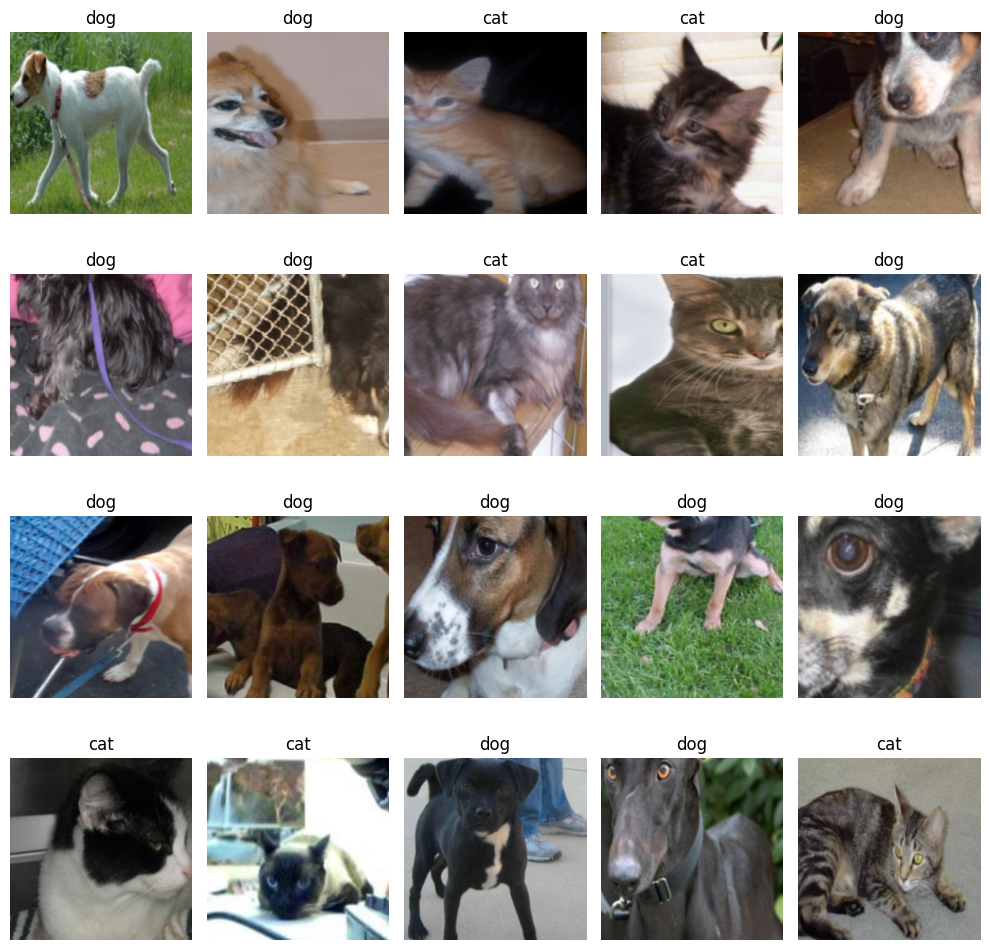

In [ ]:
# 첫 배치의 20개 랜덤 시각화

plt.figure(figsize = (10, 10))

img, label = next(iter(train_loader))

for idx in range(20):
  plt.subplot(4, 5, idx+1)
  plt.imshow(img[idx].permute(1, 2, 0))
  if label[idx] == 0:
    plt.title('cat')
  else:
    plt.title('dog')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from torchvision import models
from torchvision.models import list_models

print(list_models(module = models))

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [ ]:
from torchvision.models import resnet18

model = resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models import resnet18
import torch.nn as nn

model = resnet18(weights = "DEFAULT")

for param in model.parameters():
  param.requires_grad = False

feat = model.fc.in_features
model.fc = nn.Linear(feat, 2)

for param in model.fc.parameters():
  param.requires_grad = True

for name, param in model.named_parameters():
  if param.requires_grad:
    print(name, param.data)

model.to(device)

print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 107MB/s]


In [ ]:
from torch.optim import Adam

learning_rate = 1e-3

criterion = nn.CrossEntropyLoss()

param_list = []
for param in model.parameters():
  if param.requires_grad == True:
    param_list.append(param)
optimizer = Adam(param_list, lr = learning_rate)

In [ ]:
epochs = 100

pre_acc = 0

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(epochs):
  model.train()
  train_loss = 0
  train_total = 0
  train_correct = 0
  for img, label in train_loader:
    img, label = img.to(device), label.to(device)
    out = model(img)

    loss = criterion(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    bs = img.size(0)
    train_loss += loss.item() * bs

    pred = out.argmax(dim = 1)
    train_correct += (pred == label).sum().item()

    train_total += bs

  avg_train_loss = train_loss / train_total
  avg_train_acc = train_correct / train_total * 100
  train_loss_list.append(avg_train_loss)
  train_acc_list.append(avg_train_acc)


  model.eval()
  test_loss = 0
  test_total = 0
  test_correct = 0

  with torch.no_grad():
    for img_test, label_test in test_loader:
      img_test, label_test = img_test.to(device), label_test.to(device)
      out = model(img_test)
      loss = criterion(out, label_test)

      bs = img_test.size(0)
      test_loss += loss.item() * bs

      pred = out.argmax(dim = 1)
      test_correct += (pred == label_test).sum().item()

      test_total += bs

  avg_test_loss = test_loss / test_total
  avg_test_acc = test_correct / test_total * 100
  test_loss_list.append(avg_test_loss)
  test_acc_list.append(avg_test_acc)

  print(
        f"[{epoch+1}/{epochs}] "
        f"train_loss: {avg_train_loss:.4f}, train_acc: {avg_train_acc:.2f}% | "
        f"test_loss: {avg_test_loss:.4f}, test_acc: {avg_test_acc:.2f}%"
    )

  if avg_test_acc > pre_acc:
    pre_acc = avg_test_acc
    torch.save(model, 'model.pth')

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(train_acc_list)
plt.title('train acc')

plt.subplot(2, 2, 2)
plt.plot(test_acc_list)
plt.title('test acc')

plt.subplot(2, 2, 3)
plt.plot(train_loss_list)
plt.title('train loss')

plt.subplot(2, 2, 4)
plt.plot(test_loss_list)
plt.title('test loss')

plt.show()

In [ ]:
# 위에서 test 의 마지막 batch 로 나온 pred, label_test 이용

for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(img_test[i].permute(1, 2, 0))
  plt.title(str(pred[i]) + "(" + str(label_test[i]) + ")")

plt.tight_layout()
plt.show()

In [ ]:
data_path = '/content/drive/MyDrive/딥러닝 파이토치 교과서/5.3_CatDog/cat.jpg'

import cv2
from torchvision.transforms import ToTensor

img = cv2.imread(data_path)

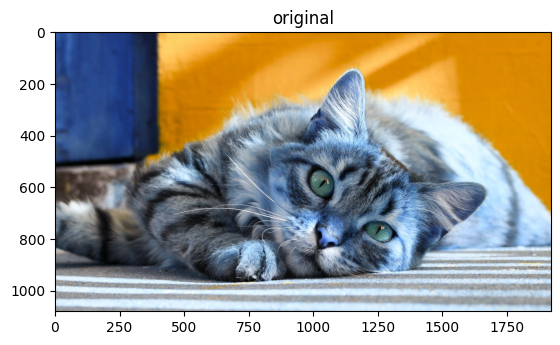

In [ ]:
# imshow 로 원본

plt.imshow(img)
plt.title("original")
plt.show()

In [ ]:
from torchvision.models import resnet18

model = resnet18()
layer_names = [name for name, _ in model.named_modules()] # model.named_children()
print(layer_names)

['', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer3', 'layer3.0', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer4', 'layer4.0', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'layer4.1', 'layer4.1.

In [ ]:
img = ToTensor()(img).unsqueeze(0)#.to(device)

In [ ]:
layer_names = [name for name, _ in model.named_modules()][1:]
step = len(layer_names) // 16
layer_names = layer_names[::step]

In [ ]:
model = model.eval()#.to(device).eval()

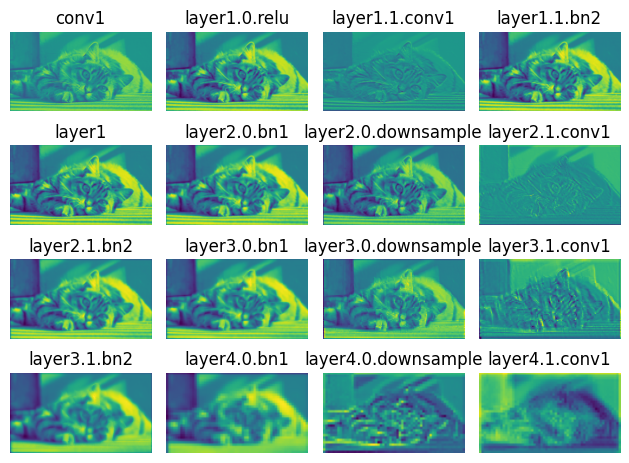

In [ ]:
features = {}

def make_hook(name):
    def hook(module, inputs, output):
        features[name] = output.cpu()
    return hook

layer_names = [name for name, _ in model.named_modules()][1:]
step = len(layer_names) // 16
layer_names = layer_names[::step][:16]


handles = []
named = dict(model.named_modules())
for name in layer_names:
    layer = named[name]
    handles.append(layer.register_forward_hook(make_hook(name)))

model(img)

for h in handles:
    h.remove()

for idx, name in enumerate(features.keys()):
    fmap = features[name][0]              # [C,H,W]
    fmap2d = fmap.mean(dim=0).detach().numpy()     # [H,W]
    plt.subplot(4, 4, idx+1)
    plt.imshow(fmap2d)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

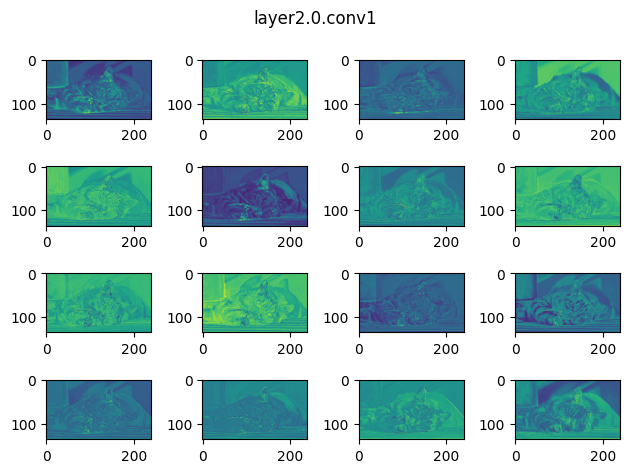

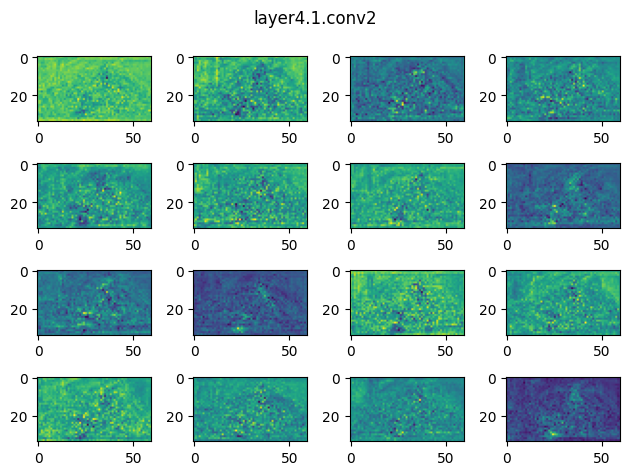

In [ ]:
# 다 거치되, 특정 conv 두개만 각각 16개 피처맵 (layer2.0.conv1, 'layer4.1.conv2'): 점점 강한 특징 부분만

features = {}

def make_hook(name):
    def hook(module, inputs, output):
        features[name] = output.cpu()
    return hook

layer_names = ['layer2.0.conv1', 'layer4.1.conv2']


handles = []
named = dict(model.named_modules())
for name in layer_names:
    layer = named[name]
    handles.append(layer.register_forward_hook(make_hook(name)))

model(img)

for h in handles:
    h.remove()

for name in layer_names:
  for idx in range(16):
      fmap = features[name][0]              # [C,H,W]
      fmap2d = fmap[idx].detach().numpy() # [H,W]
      plt.subplot(4, 4, idx+1)
      plt.imshow(fmap2d)
      plt.suptitle(name)
  plt.tight_layout()
  plt.show()


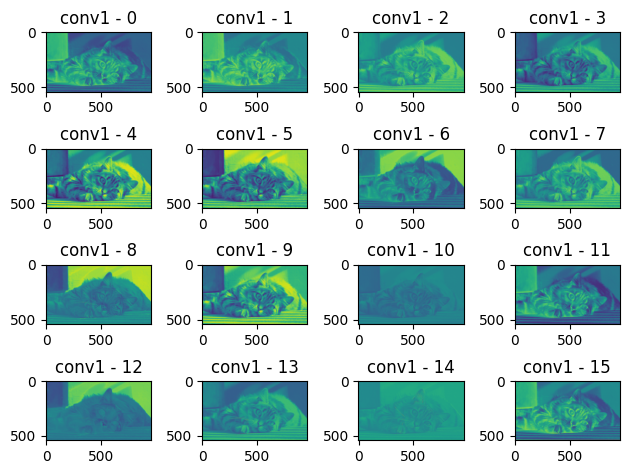

In [ ]:
# 하나의 레이어에 대해서만 출력해보기

features = {}

def make_hook(name):
    def hook(module, inputs, output):
        features[name] = output.cpu()
    return hook

name = 'conv1'
named = dict(model.named_modules())
layer = named[name]
handle = layer.register_forward_hook(make_hook(name))

model(img)

handle.remove()

fmap = features[name][0]  # [C,H,W]
num_maps = min(16, fmap.shape[0])

for i in range(num_maps):
    plt.subplot(4, 4, i+1)
    plt.imshow(fmap[i].detach().numpy())
    plt.title(f"{name} - {i}")

plt.tight_layout()
plt.show()